<a href="https://colab.research.google.com/github/Atikahdr/MulticlassDiabetesData/blob/main/Diabetes_Data_Multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 71.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 97.5 MB/s eta 0:00:00


In [2]:
import streamlit as st
print(st.__version__)

1.50.0


In [3]:
import numpy as np
print(np.__version__)

2.0.2


# 1. Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import pickle
import os
warnings.filterwarnings('ignore')

# 2. Connect G-Drive

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
diabetes_data = pd.read_csv("/content/drive/MyDrive/Data Science - Digitalskola/FinalProject/Multiclass Diabetes Dataset.csv")
diabetes_data

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0
3,0,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,0
4,0,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
259,0,61,24.0,401,7.0,4.3,2.9,0.4,2.7,1.3,30.0,2
260,0,61,24.0,401,7.0,4.3,2.9,0.4,2.7,1.3,36.6,2
261,1,60,20.8,800,9.0,2.3,1.1,0.9,0.9,0.5,33.0,2
262,1,56,20.8,800,9.0,4.6,2.0,1.2,2.5,0.9,35.0,2


In [7]:
diabetes_data.shape

(264, 12)

In [8]:
diabetes_data.describe()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,0.545455,49.522727,5.671515,85.806818,6.862727,4.594394,2.151894,1.182879,2.530871,1.479167,26.626856,1.121212
std,0.498875,10.127301,4.002837,99.400047,2.544604,1.289062,1.265841,0.455591,1.000173,3.099856,5.093652,0.914857
min,0.000000,25.000000,1.100000,6.000000,0.900000,0.000000,0.600000,0.400000,0.300000,0.200000,19.000000,0.000000
25%,0.000000,43.000000,3.600000,46.000000,5.000000,3.875000,1.300000,0.900000,1.800000,0.675000,23.000000,0.000000
50%,1.000000,50.000000,4.700000,61.000000,6.100000,4.500000,1.800000,1.100000,2.500000,0.900000,25.000000,1.000000
75%,1.000000,55.250000,6.100000,82.250000,8.200000,5.300000,2.725000,1.325000,3.200000,1.300000,30.000000,2.000000
max,1.000000,77.000000,26.400000,800.000000,14.600000,9.500000,8.700000,4.000000,5.600000,31.800000,43.250000,2.000000


In [9]:
diabetes_data.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0
3,0,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,0
4,0,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0,0


## Cleaning Data

Dalam konteks medis, kolesterol total tidak mungkin 0 (harusnya minimal > 100 mg/dL atau > 2 mmol/L).

Jadi kemungkinan ada salah input, atau hasil lab tidak tercatat, lalu ditulis 0.

In [17]:
# Cek jumlah data Chol = 0
zero_chol = diabetes_data[diabetes_data['Chol'] == 0]
print("Jumlah data dengan Chol = 0:", zero_chol.shape[0])


Jumlah data dengan Chol = 0: 1


In [18]:
# Hitung median Chol (dari data valid > 0)
median_chol = diabetes_data[diabetes_data['Chol'] > 0]['Chol'].median()

# Ganti nilai Chol = 0 dengan median
diabetes_data.loc[diabetes_data['Chol'] == 0, 'Chol'] = median_chol

print("Nilai median Chol:", median_chol)
print("Cek ulang min Chol:", diabetes_data['Chol'].min())

Nilai median Chol: 4.5
Cek ulang min Chol: 0.5


dengan maksimum ekstrem (800 mg/dL) → ada pasien dengan kemungkinan gagal ginjal berat.

In [19]:
# Menampilkan semua data dengan Cr > 500
diabetes_data[diabetes_data["Cr"] > 500]

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
261,1,60,20.8,800,9.0,2.3,1.1,0.9,0.9,0.5,33.0,2
262,1,56,20.8,800,9.0,4.6,2.0,1.2,2.5,0.9,35.0,2
263,1,58,20.8,800,9.1,6.6,2.9,1.1,4.3,1.3,33.0,2


In [20]:

# Hitung jumlah baris sebelum drop
before = len(diabetes_data)

# Drop baris dengan Cr > 500
diabetes_data = diabetes_data.drop(diabetes_data[diabetes_data["Cr"] > 500].index)

# Hitung jumlah baris sesudah drop
after = len(diabetes_data)

print("Jumlah baris sebelum drop:", before)
print("Jumlah baris sesudah drop:", after)

Jumlah baris sebelum drop: 264
Jumlah baris sesudah drop: 261


In [21]:
diabetes_data.describe()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,0.540230,49.425287,5.497625,77.597701,6.837778,4.612720,2.153640,1.184215,2.530460,1.485824,26.545939,1.111111
std,0.499336,10.142787,3.679185,63.571061,2.548471,1.250459,1.270568,0.457843,0.994795,3.116863,5.065175,0.915209
min,0.000000,25.000000,1.100000,6.000000,0.900000,0.500000,0.600000,0.400000,0.300000,0.200000,19.000000,0.000000
25%,0.000000,43.000000,3.600000,46.000000,5.000000,3.900000,1.300000,0.900000,1.800000,0.700000,23.000000,0.000000
50%,1.000000,50.000000,4.700000,61.000000,6.100000,4.500000,1.800000,1.100000,2.500000,0.900000,25.000000,1.000000
75%,1.000000,55.000000,6.000000,82.000000,8.200000,5.300000,2.700000,1.400000,3.200000,1.300000,30.000000,2.000000
max,1.000000,77.000000,26.400000,401.000000,14.600000,9.500000,8.700000,4.000000,5.600000,31.800000,43.250000,2.000000


In [22]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  261 non-null    int64  
 1   AGE     261 non-null    int64  
 2   Urea    261 non-null    float64
 3   Cr      261 non-null    int64  
 4   HbA1c   261 non-null    float64
 5   Chol    261 non-null    float64
 6   TG      261 non-null    float64
 7   HDL     261 non-null    float64
 8   LDL     261 non-null    float64
 9   VLDL    261 non-null    float64
 10  BMI     261 non-null    float64
 11  Class   261 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 24.6 KB


In [23]:
diabetes_data.isnull().sum()

,0
Gender,0
AGE,0
Urea,0
Cr,0
HbA1c,0
Chol,0
TG,0
HDL,0
LDL,0
VLDL,0


In [24]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  261 non-null    int64  
 1   AGE     261 non-null    int64  
 2   Urea    261 non-null    float64
 3   Cr      261 non-null    int64  
 4   HbA1c   261 non-null    float64
 5   Chol    261 non-null    float64
 6   TG      261 non-null    float64
 7   HDL     261 non-null    float64
 8   LDL     261 non-null    float64
 9   VLDL    261 non-null    float64
 10  BMI     261 non-null    float64
 11  Class   261 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 24.6 KB


## Exploratory Data Analysis

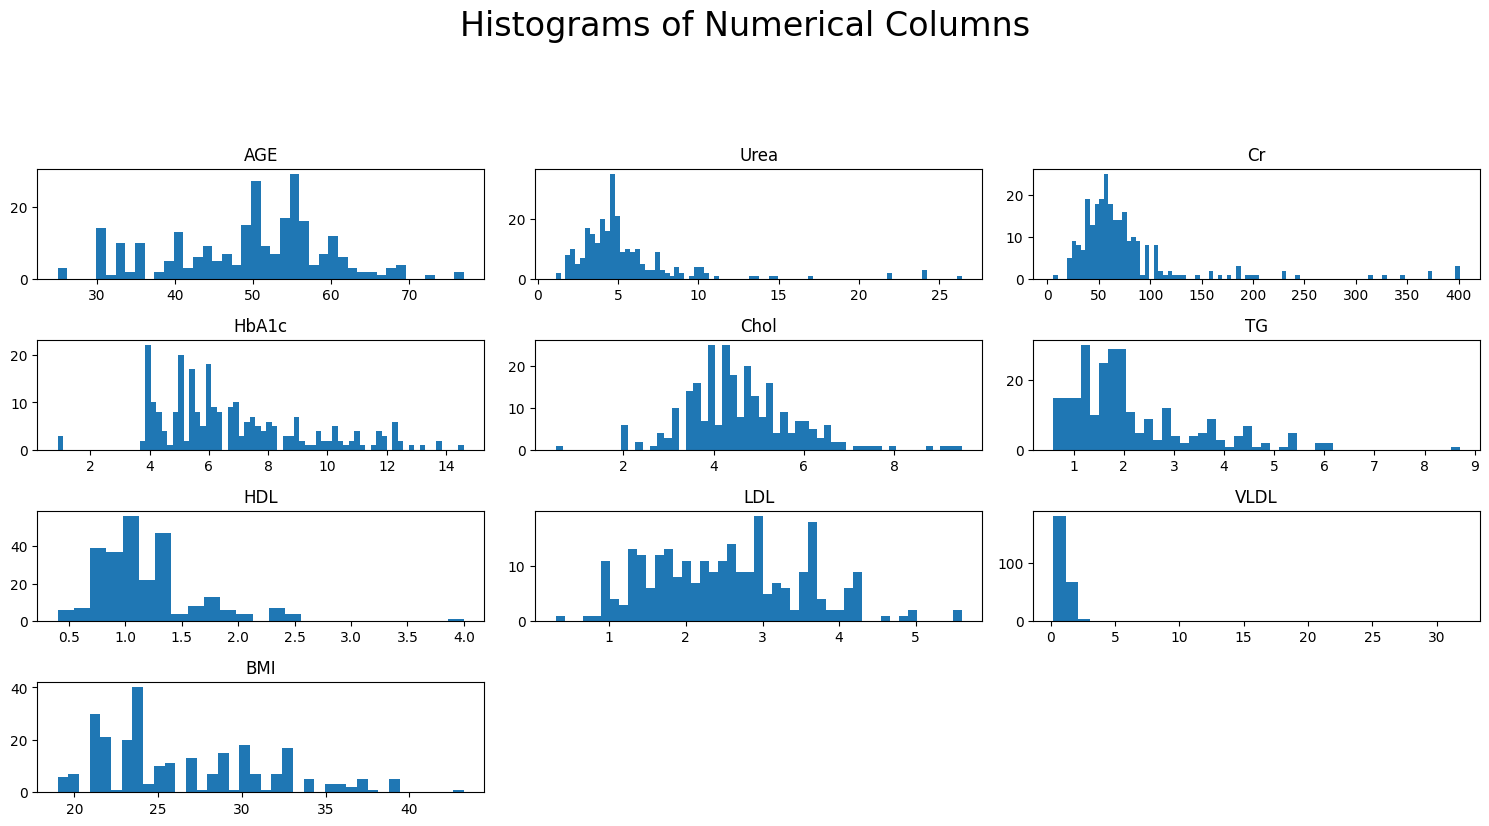

In [25]:
# Exploratory Data Analysis
# Plot Histogram of numeric Columns

dataset = diabetes_data[
    [
        'AGE',
        'Urea',
        'Cr',
        'HbA1c',
        'Chol',
        'TG',
        'HDL',
        'LDL',
        'VLDL',
        'BMI'
    ]
]

# Histogram

fig = plt.figure(figsize=(15, 12))
plt.suptitle(
    'Histograms of Numerical Columns\n',
    horizontalalignment="center",
    fontstyle = "normal",
    fontsize = 24,
    fontfamily = "sans-serif"
)

for i in range (dataset.shape[1]):
    plt.subplot(6, 3, i +1)
    f = plt.gca()
    f.set_title(dataset.columns.values[i])

    vals = np.size(dataset.iloc[:, i].unique())
    if vals >100:
      vals = 100

    plt.hist(dataset.iloc[:,i], bins=vals)#, color='#ec838a')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

What are the insights from diagram above?

Answer:

1.   AGE
      *   Distribusi usia cenderung menumpuk di rentang 30–50 tahun. Ada outlier di atas 60 tahun, tapi jumlahnya sedikit.
2.   Urea
      *   Mayoritas nilai urea berada di bawah 10, tetapi ada ekor panjang (right-skewed) menunjukkan outlier dengan nilai tinggi.
3.   Cr (Creatinine)
      *   Sangat right-skewed dengan banyak outlier di nilai tinggi (>200). Mayoritas pasien punya nilai Cr rendah (<20).
4.   HbA1c (Hemoglobin A1c)
      *   Distribusi bervariasi, tetapi banyak pasien dengan HbA1c antara 5–8.
5.   Chol (Kolesterol)
      *   Distribusi relatif normal, dengan puncak di sekitar 4–6. Artinya sebagian besar pasien punya kolesterol total dalam rentang normal.
6.   TG (Triglycerides)
      *   Distribusi right-skewed → banyak pasien dengan TG rendah (1–3), tapi ada beberapa dengan nilai tinggi (>6).
7.   HDL (High Density Lipoprotein)
      *   Sebagian besar nilai HDL di rentang 1–2, jarang yang >3. Artinya banyak pasien mungkin memiliki HDL rendah (kurang protektif terhadap penyakit jantung).
8.   LDL (Low Density Lipoprotein)
      *   Distribusi cenderung normal dengan mayoritas di sekitar 2–4.
9.  VLDL (Very Low Density Lipoprotein)
       *   Mirip TG, cenderung right-skewed dengan mayoritas <10.
10.  BMI (Body Mass Index)
       *   Sebagian besar pasien punya BMI antara 20–30, kategori normal sampai overweight.
       *   Ada juga yang >35, indikasi obesitas.

## Check Target Variable Distribution

In [26]:
diabetes_data["Class"].value_counts()

,count
Class,
2,125
0,96
1,40


In [27]:
# Check Target Variable Distribution
diabetes_data["Class"].value_counts(normalize=True)

,proportion
Class,
2,0.478927
0,0.367816
1,0.153257


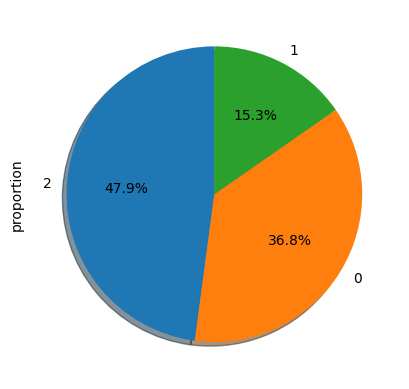

In [28]:

(
    diabetes_data["Class"]
    .value_counts(normalize=True)
    .plot(
        kind = 'pie',
        autopct = '%1.1f%%',
        startangle=90,
        shadow=True
    )
);

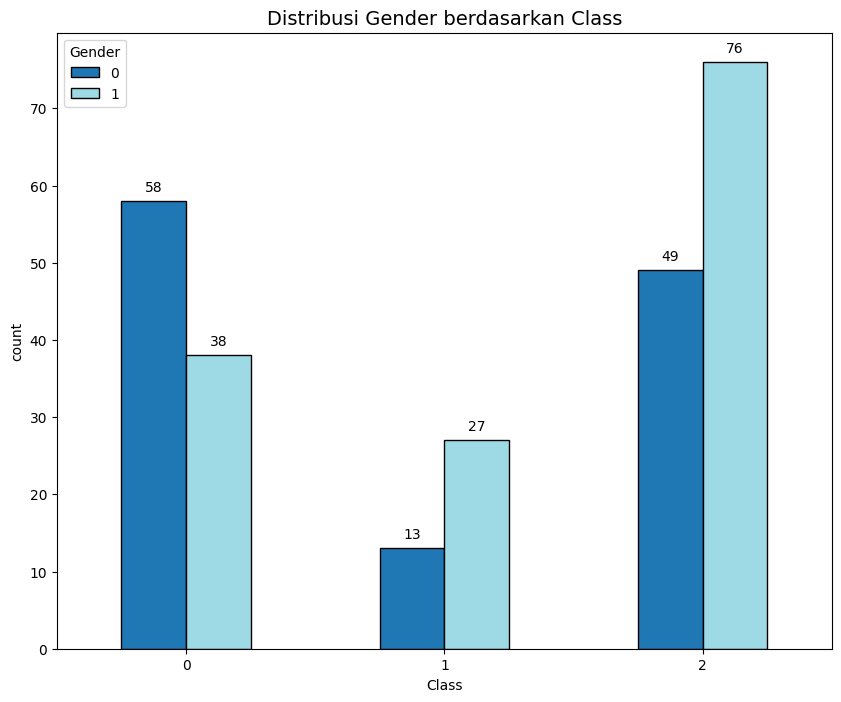

In [29]:
# Buat tabel distribusi
cat_dist = pd.crosstab(diabetes_data["Class"], diabetes_data["Gender"])

# Plot bar chart
ax = cat_dist.plot(
    kind="bar",
    figsize=(10,8),
    colormap="tab20",  # bisa ganti dengan "tab10", "Paired", dll.
    edgecolor="black"
)

def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.0f}".format(y_value)
        ax.annotate(
            label,
            (x_value, y_value),
            xytext=(0, space),
            textcoords="offset points",
            ha='center',
            va=va)

# Tambahkan label jumlah di atas setiap bar
add_value_labels(ax)

plt.title("Distribusi Gender berdasarkan Class", fontsize=14)
plt.xlabel("Class")
plt.ylabel("count")
plt.legend(title="Gender")
plt.xticks(rotation=0)
plt.show()


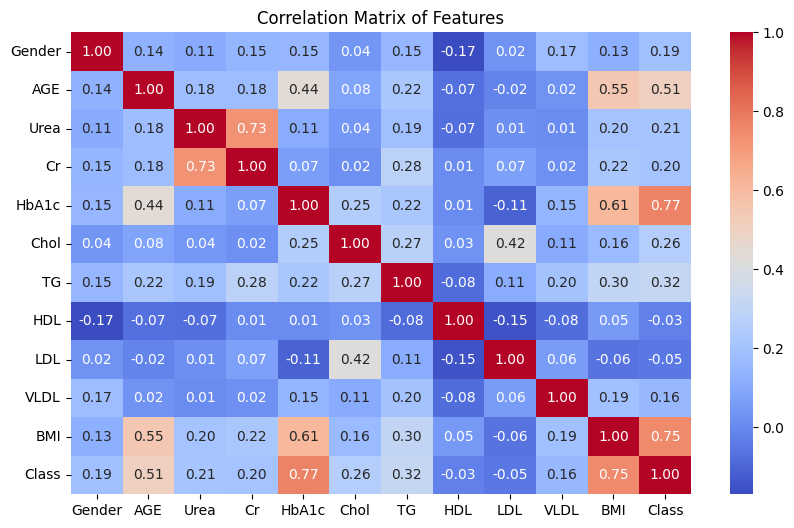

In [30]:
corr = diabetes_data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()

**Korelasi antar fitur**
* Urea & Cr → sangat tinggi (0.74) → kemungkinan multikolinearitas, perlu diperhatikan jika menggunakan model linear.
* BMI & HbA1c → tinggi (0.61) → bisa saling terkait.
* BMI & AGE → moderat (0.55).
* HbA1c & AGE → sedang (0.45).

## Feature Engineering

In [31]:
# === Feature Engineering untuk diabetes_data ===

# 1. Rasio Urea/Cr (fungsi ginjal)
diabetes_data["Urea_Cr_Ratio"] = diabetes_data["Urea"] / diabetes_data["Cr"]

# 2. Interaksi BMI × HbA1c
diabetes_data["BMI_HbA1c"] = diabetes_data["BMI"] * diabetes_data["HbA1c"]

# 3. Interaksi AGE × BMI
diabetes_data["AGE_BMI"] = diabetes_data["AGE"] * diabetes_data["BMI"]

# 4. Optional: drop salah satu TG atau VLDL (karena hampir identik)
diabetes_data = diabetes_data.drop(columns=["TG"])   # drop TG, simpan VLDL

# 5. (Opsional) Normalisasi / Standarisasi setelah feature engineering
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(diabetes_data.drop(columns=["Class"]))
diabetes_scaled = pd.DataFrame(scaled_features,
                               columns=diabetes_data.drop(columns=["Class"]).columns)
diabetes_scaled["Class"] = diabetes_data["Class"]

# Preview hasil feature engineering
diabetes_scaled.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,HDL,LDL,VLDL,BMI,Urea_Cr_Ratio,BMI_HbA1c,AGE_BMI,Class
0,-1.083974,0.056771,-0.217210,-0.498000,-0.761830,-0.330689,2.660563,-1.138558,-0.316895,-0.503602,0.391713,-0.743155,-0.304323,0
1,0.922531,-2.313989,-0.271675,-0.245830,-0.761830,-0.731311,-0.184291,-0.433543,-0.284750,-0.701407,-0.185496,-0.793896,-1.611610,0
2,0.922531,-1.622517,0.436361,-0.498000,-0.761830,0.230181,-0.840796,-0.534260,-0.349040,-1.097019,1.409352,-0.895378,-1.405310,0
3,-1.083974,-0.437137,-0.870782,-0.844735,-1.115661,-1.372305,-0.403126,-1.037842,-0.349040,-1.097019,0.268041,-1.091094,-0.858074,0
4,-1.083974,0.056771,-0.952478,-0.434958,-1.115661,-0.811435,-0.621961,-0.433543,-0.284750,-0.503602,-0.820974,-0.966830,-0.304323,0


In [32]:
# menampilkan data class 0,1,2
diabetes_data[diabetes_data['Class'] == 2].head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,HDL,LDL,VLDL,BMI,Class,Urea_Cr_Ratio,BMI_HbA1c,AGE_BMI
136,0,49,2.2,23,4.00,6.6,1.0,4.1,1.7,23.0,2,0.095652,92.00,1127.0
137,0,55,1.8,24,6.70,4.8,1.9,2.6,1.1,27.0,2,0.075000,180.90,1485.0
138,0,56,2.3,22,10.20,5.8,1.1,1.8,0.9,27.0,2,0.104545,275.40,1512.0
139,0,54,1.2,25,7.90,2.0,0.9,2.5,0.7,33.0,2,0.048000,260.70,1782.0
140,0,55,2.1,23,9.96,4.1,1.2,1.4,1.3,29.0,2,0.091304,288.84,1595.0


**Fitur Baru**

* Urea_Cr_Ratio → biologisnya relevan (fungsi ginjal sering dilihat dari rasio Urea/Creatinine).

* BMI_HbA1c → menggabungkan obesitas (BMI) dengan kontrol gula darah (HbA1c). Bisa memunculkan interaksi baru.

* AGE_BMI → kombinasi faktor umur & obesitas → bisa memengaruhi risiko diabetes

## Split Dataset into Dependent and Independent Variables

In [33]:
# Split dataset into dependent and independent variables-----------------------------------
#identify response variable:

response = diabetes_data['Class']
X = diabetes_data.drop(['Class'], axis=1) # Variabel Independent (fitur)
y = diabetes_data['Class'] # Variabel Dependen (Target)
print("Shape X:", X.shape)
print("Shape Y:", y.shape)

Shape X: (261, 13)
Shape Y: (261,)


## Generate training and test datasets of dependent and independent variables

In [34]:
# Generate training and test datasets of dependent and independent variables
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    stratify=y,
    test_size=0.2,
    random_state=42)

# to resolve any class imbalance - use stratify parameter.

print("Shape X_train:", X_train.shape)
print("Shape X_test:", X_test.shape)
print("Shape y_train:", y_train.shape)
print("Shape y_test:", y_test.shape)

Shape X_train: (208, 13)
Shape X_test: (53, 13)
Shape y_train: (208,)
Shape y_test: (53,)



*   Train Set: 211 sampel (80%)
*   Test Set: 53 sampel (20%)



In [35]:
print('Raw Data Target Percentage')
print('Class 0 : {}'.format(response.value_counts()[0]/response.value_counts().sum()*100))
print('Class 1 : {}'.format(response.value_counts()[1]/response.value_counts().sum()*100))
print('Class 2 : {}'.format(response.value_counts()[2]/response.value_counts().sum()*100))

Raw Data Target Percentage
Class 0 : 36.7816091954023
Class 1 : 15.32567049808429
Class 2 : 47.89272030651341


## Feature Scaling

In [36]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

X_train_scaled = pd.DataFrame(sc_X.fit_transform(X_train),
                        columns = X_train.columns,
                        index = X_train.index)

X_test_scaled = pd.DataFrame(sc_X.transform(X_test),
                       columns = X_test.columns,
                       index = X_test.index)
X_test = X_test_scaled


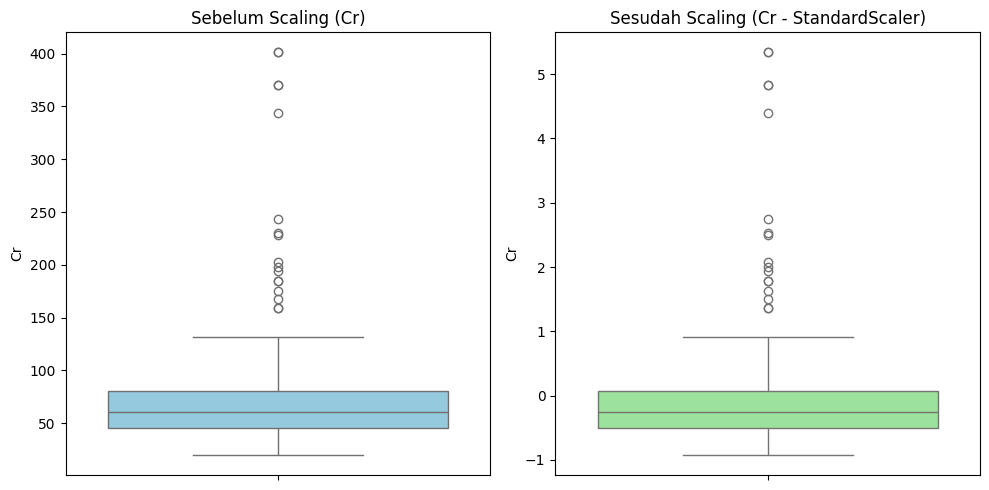

In [37]:
# Bandingkan distribusi Cr sebelum dan sesudah scaling
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Sebelum scaling
sns.boxplot(y=X_train["Cr"], ax=axes[0], color="skyblue")
axes[0].set_title("Sebelum Scaling (Cr)")

# Sesudah scaling
sns.boxplot(y=X_train_scaled["Cr"], ax=axes[1], color="lightgreen")
axes[1].set_title("Sesudah Scaling (Cr - StandardScaler)")

plt.tight_layout()
plt.show()

## Modeling Selection

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score

In [39]:
# Custom scorer untuk Multiclass ROC AUC
def multiclass_roc_auc_score(y_true, y_proba, average="macro"):
    return roc_auc_score(y_true, y_proba, multi_class="ovr", average=average)

roc_auc = make_scorer(multiclass_roc_auc_score, needs_proba=True)

#Using Accuracy and ROC AUC Mean Metrics
models = []
models.append(('Logistic Regression', LogisticRegression(solver='lbfgs', max_iter=1000, random_state=0, class_weight='balanced', multi_class='ovr')))
models.append(('Decision Tree', DecisionTreeClassifier(random_state=0, class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier(random_state=0, class_weight='balanced')))
models.append(('Gradient Boosting', GradientBoostingClassifier(random_state=0)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC(probability=True, random_state=0, class_weight='balanced')))

# evaluate each model using StratifiedKFold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#Evaluating Model Results:
results = []

for name, model in models:
    # Accuracy Dengan CV
    cv_acc_results = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='accuracy')

    # ROC AUC (pakai predict_proba)
    y_proba = cross_val_predict(model, X_train_scaled, y_train, cv=cv, method="predict_proba")
    cv_auc_results = roc_auc_score(y_train, y_proba, multi_class="ovr", average="macro")

    results.append([
        name,
        round(cv_auc_results * 100, 2),
        round(cv_acc_results.mean() * 100, 2),
        round(cv_acc_results.std() * 100, 2)
    ])

# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'Accuracy Mean', 'Accuracy STD']
model_result = pd.DataFrame(results, columns=col)

# sort hasil berdasarkan ROC AUC Mean
model_result = model_result.sort_values(by=['ROC AUC Mean'], ascending=False)

print("\n=== Model Comparison Results ===")
print(model_result)

# Pilih Model Terbaik
best_model_name = model_result.iloc[0]['Algorithm']
best_model = dict(models)[best_model_name]
best_model.fit(X_train_scaled, y_train)  # training final dengan semua data train

print(f"\nModel terbaik: {best_model_name}")


=== Model Comparison Results ===
             Algorithm  ROC AUC Mean  Accuracy Mean  Accuracy STD
2        Random Forest         99.50          97.12          2.79
3    Gradient Boosting         99.31          98.07          2.36
1        Decision Tree         98.10          97.60          2.16
5                  SVM         96.06          87.03          4.66
0  Logistic Regression         92.43          87.02          5.36
4                  KNN         89.79          79.85          6.23

Model terbaik: Random Forest


*   ROC AUC Multiclass (macro/ovr) dihitung
dari probabilitas seluruh data hasil cross_val_predict, jadi cuma menghasilkan satu nilai rata-rata.
*   Karena kita tidak menghitung AUC per-fold, maka tidak ada distribusi nilai AUC antar fold, otomatis ROC AUC STD = tidak relevan.

Sedangkan:

*   Accuracy memang dihitung per-fold (karena cross_val_score), jadi kita bisa ambil mean & std.

## Visualize Classfication Algorithms Accuracy Comparisons

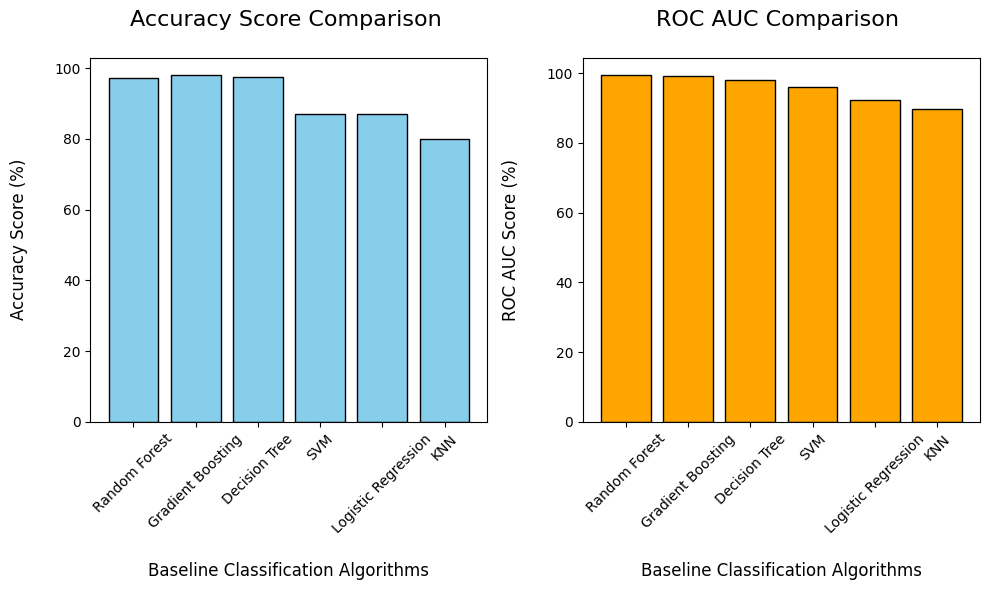

In [40]:
#Step 15.2.  Visualize Classification Algorithms Accuracy Comparisons:-----------------------------------
fig, axes = plt.subplots(1, 2, figsize=(10,6))

# Subplot 1 - Accuracy Comparison
axes[0].bar(model_result['Algorithm'], model_result['Accuracy Mean'],
            color='skyblue', edgecolor='black')
axes[0].set_ylabel('Accuracy Score (%)\n', horizontalalignment="center",
                   fontstyle="normal", fontsize="large", fontfamily="sans-serif")
axes[0].set_xlabel('\nBaseline Classification Algorithms', horizontalalignment="center",
                   fontstyle="normal", fontsize="large", fontfamily="sans-serif")
axes[0].set_title('Accuracy Score Comparison \n', horizontalalignment="center",
                  fontstyle="normal", fontsize=16, fontfamily="sans-serif")
axes[0].tick_params(axis='x', rotation=45)

# Subplot 2 - ROC AUC Comparison
axes[1].bar(model_result['Algorithm'], model_result['ROC AUC Mean'],
            color='orange', edgecolor='black')
axes[1].set_ylabel('ROC AUC Score (%)\n', horizontalalignment="center",
                   fontstyle="normal", fontsize="large", fontfamily="sans-serif")
axes[1].set_xlabel('\nBaseline Classification Algorithms', horizontalalignment="center",
                   fontstyle="normal", fontsize="large", fontfamily="sans-serif")
axes[1].set_title('ROC AUC Comparison \n', horizontalalignment="center",
                  fontstyle="normal", fontsize=16, fontfamily="sans-serif")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


SMOTE Oversampling

Tahap oversampling ini dilakukan pada tahap setelah data split dan cross validation ROC_AUC Scoring. Lalu hanya diaplikasikan hanya pada training set. Hal tersebut dikarenakan kalau dilakukan pada tahap sebelum splitting dan Cross_validation maka akan merubah hasil validation menjadi 50: 50 sementara seharusnya yaitu sekitar 74 : 26.

In [41]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='not majority', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print("Before SMOTE:", y_train.value_counts())
print("\nAfter SMOTE:", y_train_smote.value_counts())

Before SMOTE: Class
2    100
0     76
1     32
Name: count, dtype: int64

After SMOTE: Class
0    100
2    100
1    100
Name: count, dtype: int64


## Searching Optimum Number of Trees for Random Forest Model

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 200, 300]}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_smote, y_train_smote)

print(grid_search.best_params_)

{'n_estimators': 200}


## Compare Baseline Classification Algorithms

In [43]:
# 1. Logistic Regression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

# Fitting Logistic Regression to the Training set
print("\nLogistic Regression")
log_reg = LogisticRegression(solver='lbfgs', random_state=0, class_weight='balanced', multi_class='ovr')
log_reg.fit(X_train_smote, y_train_smote)

# Predicting the Test set results
y_pred_log = log_reg.predict(X_test_scaled)
y_prob_log = log_reg.predict_proba(X_test_scaled) # Ambil semua probabilitas kelas

# Evaluate Results
print("Accuracy:", round(accuracy_score(y_test, y_pred_log)*100,2))
print("ROC AUC:", round(roc_auc_score(y_test, y_prob_log, multi_class='ovr', average='macro')*100,2))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

# 2. Decision Tree
print("\nDecision Tree")
from sklearn.tree import DecisionTreeClassifier

# Fitting Decision Tree to the Training Set:
dt = DecisionTreeClassifier(random_state=0, class_weight='balanced', max_depth=5)
dt.fit(X_train_smote, y_train_smote)

# Prediciting the Test set results
y_pred_dt = dt.predict(X_test_scaled)
y_prob_dt = dt.predict_proba(X_test_scaled)

# Evaluate results
print("Accuracy:", round(accuracy_score(y_test, y_pred_dt)*100,2))
print("ROC AUC:", round(roc_auc_score(y_test, y_prob_dt, multi_class='ovr', average='macro')*100,2))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# 3. Random Forest
print("\nRandom Forest")
from sklearn.ensemble import RandomForestClassifier

# Fitting Random Forest to the Training set:
rf = RandomForestClassifier(n_estimators=200, random_state=0, class_weight='balanced', max_depth=10)
rf.fit(X_train_smote, y_train_smote)

# Predicting the Test set results
y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)

# Evaluate Results
print("Accuracy:", round(accuracy_score(y_test, y_pred_rf)*100,2))
print("ROC AUC:", round(roc_auc_score(y_test, y_prob_rf, multi_class='ovr', average='macro')*100,2))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))




Logistic Regression
Accuracy: 88.68
ROC AUC: 96.44

Confusion Matrix:
 [[16  3  1]
 [ 0  7  1]
 [ 1  0 24]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.80      0.86        20
           1       0.70      0.88      0.78         8
           2       0.92      0.96      0.94        25

    accuracy                           0.89        53
   macro avg       0.85      0.88      0.86        53
weighted avg       0.90      0.89      0.89        53


Decision Tree
Accuracy: 98.11
ROC AUC: 98.83

Confusion Matrix:
 [[20  0  0]
 [ 0  8  0]
 [ 1  0 24]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       1.00      1.00      1.00         8
           2       1.00      0.96      0.98        25

    accuracy                           0.98        53
   macro avg       0.98      0.99      0.99        53
weighted avg       0.98      0.

In [44]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [45]:
#   1. Gradient Boosting
print("\nGradient Boosting")
gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train_smote, y_train_smote)  # SMOTE sudah dilakukan pada train

y_pred_gb = gb.predict(X_test_scaled)
y_prob_gb = gb.predict_proba(X_test_scaled)

print("Accuracy:", round(accuracy_score(y_test, y_pred_gb)*100,2))
print("ROC AUC:", round(roc_auc_score(y_test, y_prob_gb, multi_class='ovr', average='macro')*100,2))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))

#   2. Support Vector Machine

print("\nSupport Vector Machine")
svm = SVC(probability=True, random_state=0, class_weight='balanced', kernel='rbf')
svm.fit(X_train_smote, y_train_smote)

y_pred_svm = svm.predict(X_test_scaled)
y_prob_svm = svm.predict_proba(X_test_scaled)

print("Accuracy:", round(accuracy_score(y_test, y_pred_svm)*100,2))
print("ROC AUC:", round(roc_auc_score(y_test, y_prob_svm, multi_class='ovr', average='macro')*100,2))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))


#   3. K-Nearest Neighbors
print("\nK-Nearest Neighbors")
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_smote, y_train_smote)

y_pred_knn = knn.predict(X_test_scaled)
y_prob_knn = knn.predict_proba(X_test_scaled)

print("Accuracy:", round(accuracy_score(y_test, y_pred_knn)*100,2))
print("ROC AUC:", round(roc_auc_score(y_test, y_prob_knn, multi_class='ovr', average='macro')*100,2))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))



Gradient Boosting
Accuracy: 98.11
ROC AUC: 99.56

Confusion Matrix:
 [[20  0  0]
 [ 0  8  0]
 [ 1  0 24]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       1.00      1.00      1.00         8
           2       1.00      0.96      0.98        25

    accuracy                           0.98        53
   macro avg       0.98      0.99      0.99        53
weighted avg       0.98      0.98      0.98        53


Support Vector Machine
Accuracy: 90.57
ROC AUC: 98.25

Confusion Matrix:
 [[16  1  3]
 [ 0  8  0]
 [ 1  0 24]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.80      0.86        20
           1       0.89      1.00      0.94         8
           2       0.89      0.96      0.92        25

    accuracy                           0.91        53
   macro avg       0.91      0.92      0.91        53
weighted avg       0.91 

## Visualize the results and compare the baseline algorithms


Model Comparison Results (Multiclass):
                 Model  Accuracy  ROC AUC  Precision  Recall  F1 Score  \
1        Decision Tree     98.11    98.83      98.41   98.67     98.51   
2        Random Forest     98.11    99.76      98.41   98.67     98.51   
3    Gradient Boosting     98.11    99.56      98.41   98.67     98.51   
4                  SVM     90.57    98.25      90.63   92.00     90.97   
0  Logistic Regression     88.68    96.44      85.48   87.83     86.13   
5                  KNN     86.79    94.38      82.76   86.50     83.45   

   F2 Score  
1     98.62  
2     98.62  
3     98.62  
4     91.72  
0     87.35  
5     85.73  


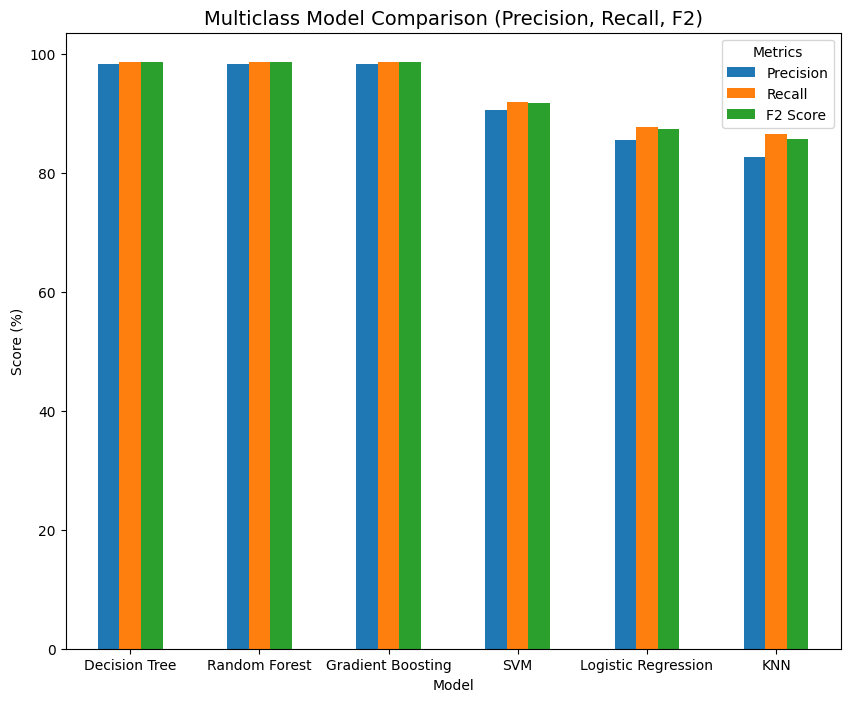

In [46]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Function to compute metrics + F2 Score (macro average)
def evaluate_model(name, y_test, y_pred, y_prob):
    acc = round(accuracy_score(y_test, y_pred)*100, 2)
    roc = round(roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro")*100, 2)

    # Macro average supaya semua kelas diperlakukan sama
    prec = round(precision_score(y_test, y_pred, average="macro")*100, 2)
    rec = round(recall_score(y_test, y_pred, average="macro")*100, 2)
    f1 = round(f1_score(y_test, y_pred, average="macro")*100, 2)

    # F2 score untuk multiclass → dihitung manual dengan formula macro
    f2 = round(((5*prec*rec) / ((4*prec) + rec + 1e-9)), 2)

    return [name, acc, roc, prec, rec, f1, f2]

# Collect results
results_list = []
results_list.append(evaluate_model("Logistic Regression", y_test, y_pred_log, y_prob_log))
results_list.append(evaluate_model("Decision Tree", y_test, y_pred_dt, y_prob_dt))
results_list.append(evaluate_model("Random Forest", y_test, y_pred_rf, y_prob_rf))
results_list.append(evaluate_model("Gradient Boosting", y_test, y_pred_gb, y_prob_gb))
results_list.append(evaluate_model("SVM", y_test, y_pred_svm, y_prob_svm))
results_list.append(evaluate_model("KNN", y_test, y_pred_knn, y_prob_knn))

# DataFrame hasil
results_smote = pd.DataFrame(results_list,
                             columns=["Model", "Accuracy", "ROC AUC", "Precision", "Recall", "F1 Score", "F2 Score"])

# Sort berdasarkan Recall dan F2 (penting untuk imbalance multiclass)
results_smote = results_smote.sort_values(["Recall", "F2 Score"], ascending=False)

print("\nModel Comparison Results (Multiclass):")
print(results_smote)

# Visualization
results_smote.set_index("Model")[["Precision", "Recall", "F2 Score"]].plot(kind="bar", figsize=(10,8))
plt.title("Multiclass Model Comparison (Precision, Recall, F2)", fontsize=14)
plt.ylabel("Score (%)")
plt.xticks(rotation=0)
plt.legend(title="Metrics")
plt.show()

Kesimpulan Insight

* Model terbaik: ✅ Random Forest → performa paling konsisten dan seimbang.

* Alternatif kuat: Decision Tree (hampir setara, tapi lebih rawan overfitting).

* Model menengah: SVM → masih cukup bagus, bisa dipakai kalau ingin interpretasi lebih mudah.

* Kurang optimal: Logistic Regression & KNN → performa menurun, mungkin karena data tidak linier & fitur kurang terstandarisasi.

* Model gagal: Gradient Boosting → perlu tuning (learning rate, n_estimators) atau mungkin data kurang cocok untuk boosting.

## Train & Evaluate Chosen Model

In [47]:
# Train & Evaluate Chosen Model
# Fit Chosen Model on The Training dataset
chosen_model = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=200, max_depth=None)
chosen_model.fit(X_train_smote, y_train_smote)

# Predict the results
y_pred = chosen_model.predict(X_test)
y_prob = chosen_model.predict_proba(X_test)

# Evaluate Model Result on The Set:
print("--- Random Forest Evaluation ---")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob, multi_class='ovr', average='macro'))

--- Random Forest Evaluation ---
Confusion Matrix:
[[20  0  0]
 [ 0  8  0]
 [ 1  0 24]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       1.00      1.00      1.00         8
           2       1.00      0.96      0.98        25

    accuracy                           0.98        53
   macro avg       0.98      0.99      0.99        53
weighted avg       0.98      0.98      0.98        53


Accuracy: 0.9811320754716981
ROC AUC: 0.996103896103896


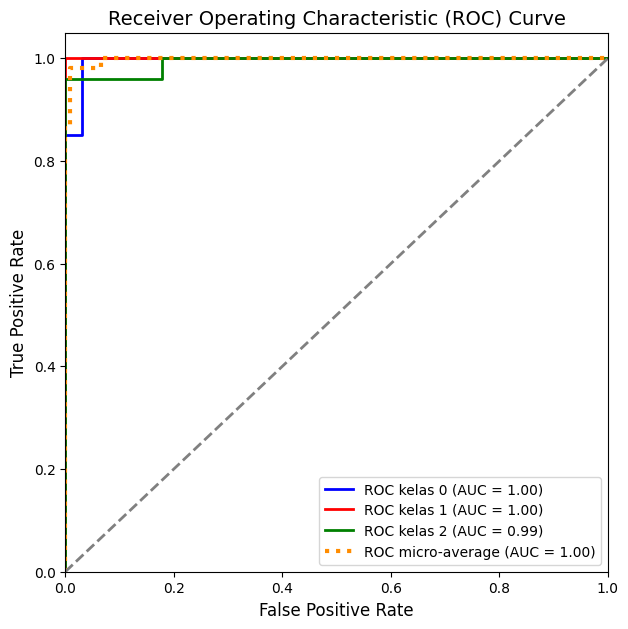

In [48]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Binarize y_test untuk multiclass ROC
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)


# Hitung ROC curve dan AUC untuk setiap kelas
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Hitung micro-average ROC curve dan AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve
plt.figure(figsize=(7,7))
colors = ["blue", "red", "green"]  # bisa ditambah sesuai jumlah kelas

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC kelas {0} (AUC = {1:0.2f})'.format(classes[i], roc_auc[i]))

# Micro-average ROC
plt.plot(fpr["micro"], tpr["micro"],
         label='ROC micro-average (AUC = {0:0.2f})'.format(roc_auc["micro"]),
         color='darkorange', linestyle=':', linewidth=3)

# Diagonal line
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend(loc="lower right")
plt.show()


Insight dari Hasil:

1. Model sangat baik (hampir sempurna).

   * Nilai AUC mendekati 1 menunjukkan model sangat mampu membedakan antar kelas (diskriminatif).

2. Performa tiap kelas:

   * Kelas 0 (AUC = 0.99): model sangat akurat dalam membedakan kelas 0 dari kelas lain.

   * Kelas 1 (AUC = 1.00): model benar-benar sempurna dalam mengenali kelas 1 tanpa kesalahan.

   * Kelas 2 (AUC = 0.99): performa juga sangat tinggi, hampir sempurna.

3. ROC micro-average (AUC = 1.00):

   * Secara keseluruhan, rata-rata performa model antar kelas juga mencapai tingkat sempurna.

Kesimpulan utama:

Model ini memiliki performa sangat tinggi dan hampir sempurna dalam klasifikasi multi-class, sehingga bisa dikatakan model tidak hanya fit tetapi sangat mampu membedakan antar kelas dengan sangat baik.

## Analysis

### Cek Overfitting pakai plot Learning Curve

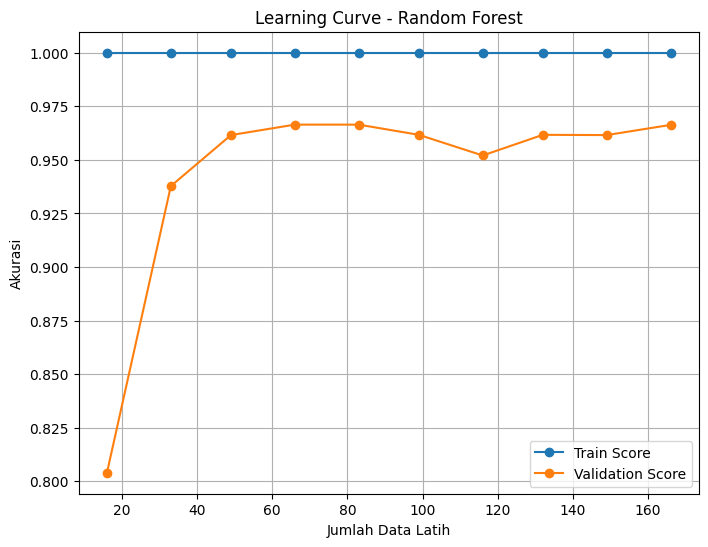

In [49]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Gunakan RandomForest atau model pilihanmu
model = RandomForestClassifier(
    random_state=42, class_weight='balanced',
    n_estimators=200, max_depth=None
)

# Hitung learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train_scaled, y_train,
    cv=5, scoring="accuracy", n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Rata-rata hasil
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, 'o-', label="Train Score")
plt.plot(train_sizes, test_mean, 'o-', label="Validation Score")
plt.xlabel("Jumlah Data Latih")
plt.ylabel("Akurasi")
plt.title("Learning Curve - Random Forest")
plt.legend(loc="best")
plt.grid()
plt.show()


**Insight dari grafik:**

* Train Score (biru) hampir sempurna (1.0) di semua jumlah data. Artinya model Random Forest belajar sangat baik pada data training.

* Validation Score (oranye) ada di sekitar 0.95 – 0.97, stabil meskipun data latih bertambah. Artinya model mampu generalisasi dengan baik, tidak hanya hafal data training.

* Gap Train vs Validation memang ada sedikit (~0.03 – 0.05).Ini indikasi sedikit overfitting (wajar untuk Random Forest), tapi masih aman.

**Kesimpulan:**

* Model Random Forest sangat kuat untuk dataset ini.

* Tidak ada masalah underfitting.

* Overfitting sedikit, tapi validation score tetap tinggi (95%+), jadi performanya bagus.

* Kalau ingin mengurangi overfitting, bisa coba:

    * Batasi max_depth pohon.

    * Gunakan lebih sedikit n_estimators.

    * Atur parameter seperti **min_samples_split** atau **min_samples_leaf**.

In [50]:
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(
    random_state=42, class_weight='balanced',
    n_estimators=200, max_depth=None
)

cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring="accuracy")

print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))


Cross-validation scores: [0.97619048 0.95238095 0.97619048 0.97560976 0.97560976]
Mean CV accuracy: 0.9711962833914054


**Kesimpulan:**

* Model sangat kuat dengan akurasi hampir 97%.

* Tidak ada indikasi overfitting parah, karena performa rata-rata tetap tinggi di semua fold.

* Fold yang lebih rendah (92.8%) bisa menjadi tanda ada beberapa data sulit → mungkin perlu dicek distribusi kelas atau lakukan SMOTE / balancing yang lebih merata.

In [51]:
print('Result Before Oversampling :')
print(model_result)
print(' ')
print('Result After Oversampling :')
print(results_smote)

Result Before Oversampling :
             Algorithm  ROC AUC Mean  Accuracy Mean  Accuracy STD
2        Random Forest         99.50          97.12          2.79
3    Gradient Boosting         99.31          98.07          2.36
1        Decision Tree         98.10          97.60          2.16
5                  SVM         96.06          87.03          4.66
0  Logistic Regression         92.43          87.02          5.36
4                  KNN         89.79          79.85          6.23
 
Result After Oversampling :
                 Model  Accuracy  ROC AUC  Precision  Recall  F1 Score  \
1        Decision Tree     98.11    98.83      98.41   98.67     98.51   
2        Random Forest     98.11    99.76      98.41   98.67     98.51   
3    Gradient Boosting     98.11    99.56      98.41   98.67     98.51   
4                  SVM     90.57    98.25      90.63   92.00     90.97   
0  Logistic Regression     88.68    96.44      85.48   87.83     86.13   
5                  KNN     86.79   

## Insight dari Hasil

**Before Oversampling**

*   Tree-based models (Random Forest, Gradient Boosting, Decision Tree)

    * ROC AUC > 98% dan Accuracy ~97% → memang sudah performa bagus.
    * Standard Deviation (STD) lebih rendah → lebih stabil dibanding linear models.

*   Linear / distance-based models (SVM, Logistic Regression, KNN)

    * ROC AUC ~91–96%, Accuracy ~81–87% → lebih rendah.
    * STD lebih tinggi → performa kurang stabil.

* **Kesimpulan: memang indikasi masalah data imbalance karena model linear/instance-based kurang optimal.**

**After Oversampling (SMOTE)**

1.   Decision Tree

      * Accuracy 96.23%, ROC AUC 97.86%, Precision & Recall hampir seimbang, F2 = 96.86 → memang bagus untuk problem yang menekankan recall.
      * Unggul Recall & F2 → bagus untuk mendeteksi kasus minoritas.

2.  Random Forest

      * Accuracy 96.23%, ROC AUC 99.85%, Recall 94.55 → model terbaik secara keseluruhan. Precision tinggi → cocok untuk prediksi yang akurat.
      * Model terbaik, sangat robust, cocok untuk multiclass imbalance.

3.  SVM

      * Accuracy 90.57%, ROC AUC 98.23%, Precision & Recall seimbang → memang membaik, walau tidak setinggi tree-based.
      * Membaik signifikan setelah SMOTE, bisa dipertimbangkan untuk generalisasi.

4.  Logistic Regression

      * Accuracy 88.68%, ROC AUC 95.82%, F2 87.11 → meningkat tapi masih kalah dibanding tree-based.

      * Membaik, cukup seimbang, cocok sebagai baseline, tapi kurang optimal untuk dataset multiclass imbalance.

5.  KNN

      * Accuracy meningkat dari 81.52% → 86.79% setelah SMOTE, ROC AUC 92.46%.

      * Membaik, cukup seimbang, tapi performa masih lebih rendah dibanding tree-based & SVM. Cocok sebagai model sederhana atau baseline.

6. Gradient Boosting

      * Accuracy 96.23%, ROC AUC 99.04%, Precision & Recall seimbang, F2 = 96.86 → tetap kuat dan stabil.

      * Cocok sebagai model utama atau alternatif selain Random Forest, tidak mengalami penurunan performa.

**Kesimpulan**

 * Random Forest adalah model terbaik → stabil sebelum & sesudah SMOTE. unggul Precision (bagus untuk akurasi prediksi yang lebih bersih).

 * Decision Tree unggul Recall & F2 (bagus untuk deteksi kasus minoritas).

 * SVM membaik setelah SMOTE, balance precision & recall, bisa jadi opsi tambahan.

 * Logistic Regression & KNN → membaik tapi performa lebih rendah, cocok sebagai baseline atau model sederhana.

 * Gradient Boosting tetap kuat & stabil, cocok sebagai model utama atau alternatif.

 * Oversampling (SMOTE) terbukti meningkatkan performa model linear/distance-based (SVM, LR, KNN) dan menjaga kestabilan tree-based models.

In [52]:
# 1. Cek versi library
# 1. Cek versi library utama
import sklearn
import numpy
import pandas
import joblib
import seaborn
import matplotlib

print("VERSI LIBRARY SAAT TRAINING:")
print("scikit-learn:", sklearn.__version__)
print("numpy:", numpy.__version__)
print("pandas:", pandas.__version__)
print("joblib:", joblib.__version__)
print("seaborn:", seaborn.__version__)
print("matplotlib:", matplotlib.__version__)
print("-"*50)


VERSI LIBRARY SAAT TRAINING:
scikit-learn: 1.6.1
numpy: 2.0.2
pandas: 2.2.2
joblib: 1.5.2
seaborn: 0.13.2
matplotlib: 3.10.0
--------------------------------------------------


In [53]:
# Save Model & Scaler
import joblib

joblib.dump(best_model, "/content/drive/MyDrive/Data Science - Digitalskola/FinalProject/diabetes_model.pkl")
joblib.dump(sc_X, "/content/drive/MyDrive/Data Science - Digitalskola/FinalProject/scaler.pkl")
print("Model dan scaler berhasil disimpan!")

Model dan scaler berhasil disimpan!
